# CIFAR-10 Luokitteluprojekti (FCN)


#### Data preparation

In [1]:
from keras.src.utils import to_categorical
from sklearn.model_selection import train_test_split
import keras

batch_size = 32  # number of images in each batch
img_size = (32, 32)  # 32 x 32 pixel images in input data

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train.reshape(-1, 32 * 32 * 3)
X_test = X_test.reshape(-1, 32 * 32 * 3)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (50000, 3072)
Test data shape: (10000, 3072)


#### Modeling

In [2]:
from keras import backend as K
from keras import layers

print(K.backend())

# Create the model
inputs = keras.Input(shape=(3072,))
x = layers.Dense(256*2, activation="relu")(inputs)
x = layers.Dense(128*2, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

tensorflow


In [3]:
model.summary()

Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=4,
    min_delta=0.001,
    restore_best_weights=True
)

history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_split=0.2, callbacks=[early_stop])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.2704 - loss: 2.0635 - val_accuracy: 0.3211 - val_loss: 1.8727
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.3881 - loss: 1.7068 - val_accuracy: 0.4099 - val_loss: 1.6640
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.4271 - loss: 1.6069 - val_accuracy: 0.4114 - val_loss: 1.6418
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4511 - loss: 1.5431 - val_accuracy: 0.4434 - val_loss: 1.5670
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.4601 - loss: 1.5039 - val_accuracy: 0.4572 - val_loss: 1.5390
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4787 - loss: 1.4693 - val_accuracy: 0.4538 - val_loss: 1.5524
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.4877 - loss: 1.4352 - val_accuracy: 0.4645 - val_loss: 1.5116
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.4949 - loss: 1.4112 - 

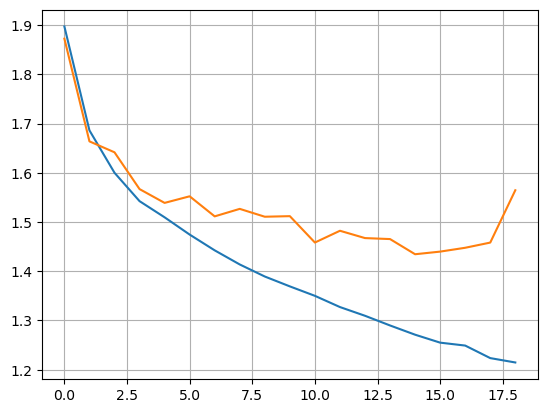

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.show()

In [6]:
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - 3ms/step - accuracy: 0.5043 - loss: 1.4200
Test loss: 1.419954538345337
Test accuracy: 0.5042999982833862
